In [41]:
import requests
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd
import requests_cache
import lxml.html as lxl
import re
import time 
import matplotlib.pyplot as plt

#### Set up a list of urls that we will be using.  

In [2]:
url_list = []
for i in range(1, 2000):
    a = 'https://www.truecar.com/used-cars-for-sale/listings/?page=' + str(i)
    url_list.append(a)

#### Set up BeautifulSoup to pull data from TrueCar page by page

#### Next, Put vehicle reference number, make-model, price and other details into lists then move those lists into a DataFrame

In [3]:
# %%time

# listing_refs = []
# year_list = []
# make_model_list = []
# price_list = []
# mileages = []
# city_condition_list = []
# state_list = []

# for i in url_list[0:1999]:
#     response = requests.get(i)
#     soup = BeautifulSoup(response.text, 'lxml')

#     listing_names = soup.find_all(class_="linkable order-2 vehicle-card-overlay")

#     char1 = '/'
#     char2 = '-'
#     for i in listing_names:
#         j = str(i)
#         a = j.find('listing/')+len('listing/')
#         b = j[a:]
#         ref = b[:b.find(char1)]
#         listing_refs.append(ref)
#         year = b[b.find(char1)+1:b.find(char1)+5]
#         year_list.append(year)
#         c = b[b.find(char2)+1:]
#         make_model = c[:c.find(char1)]
#         make_model_list.append(make_model)

#     prices = soup.find_all(class_="heading-3 margin-y-1 font-weight-bold")
#     price_string1 = 'vehicleCardPricingBlockPrice">'
#     price_string2 = '</div>'
#     for i in prices:
#         j = str(i)
#         price = j[j.find(price_string1)+len(price_string1):j.find(price_string2)]
#         price_list.append(price)
    
#     card_content = soup.find_all(class_="card-content vehicle-card-body order-3")
#     str1 = '<!-- --> miles'
#     str2 = '>'
#     for i in card_content:
#         j = str(i)
#         a = j[j.find(str1)-10:j.find(str1)]
#         mileage = a[a.find(str2)+1:]
#         mileages.append(mileage)

#     locations = soup.find_all(class_="vehicle-card-location font-size-1 margin-top-1")
#     location_string1 = '</path></svg>'
#     location_string2 = '<!-- -->, <!-- -->'
#     location_string3 = '</div>'
#     for i in locations:
#         j = str(i)
#         city_condition = j[j.find(location_string1)+len(location_string1):j.find(location_string2)]
#         city_condition_list.append(city_condition)
#         state = j[j.find(location_string2)+len(location_string2):j.find(location_string3)]
#         state_list.append(state)

# history = [i[:-5] for i in city_condition_list[1::2]]
# city = city_condition_list[0::2]
# state = state_list[0::2]

# vehicle_data = pd.DataFrame({'listing_reference': listing_refs, 'make_model': make_model_list, 'year': year_list, 
#                     'price': price_list, 'mileage': mileages, 'city': city, 'state': state, 'history': history})

# vehicle_data[['accident_history','owners', 'usage_type']] = vehicle_data['history'].str.split(',',expand=True)
# vehicle_data.drop(columns={'history'}, inplace=True)

CPU times: user 9min 29s, sys: 17.2 s, total: 9min 47s
Wall time: 1h 5min 8s


In [16]:
# vehicle_data.to_excel("TrueCar_2000pgs_April24.xlsx", index=False)

In [17]:
# vehicle_data.to_pickle("TrueCar_2000pgs_April24.pkl")

In [2]:
vehicle_data = pd.read_pickle("TrueCar_2000pgs_April24.pkl")

In [3]:
def make(x):
    a = x.find('-')
    return x[:a] 

def model(x):
    a = x.find('-')
    return x[a+1:]

vehicle_data['make'] = vehicle_data['make_model'].apply(make)
vehicle_data['model'] = vehicle_data['make_model'].apply(model)

(59973, 12)

In [6]:
#Dictionary to convert each state into US Census Region
us_abbrev_to_region = {
    "AL" : "South",
    "AK" : "West" ,
    "AZ" : "West" ,
    "AR" : "South" ,
    "CA" : "West" ,
    "CO" : "West",
    "CT" : "Northeast",
    "DE" : "South",
    "FL" : "South",
    "GA" : "South",
    "HI" : "West",
    "ID" : "West",
    "IL" : "Midwest",
    "IN" : "Midwest",
    "IA" : "Midwest",
    "KS" : "Midwest",
    "KY" : "South",
    "LA" : "South",
    "ME" : "Northeast",
    "MD" : "South",
    "MA" : "Northeast",
    "MI" : "Midwest",
    "MN" : "Midwest",
    "MS" : "South",
    "MO" : "Midwest",
    "MT" : "West",
    "NE" : "Midwest",
    "NV" : "West",
    "NH" : "Northeast",
    "NJ" : "Northeast",
    "NM" : "West",
    "NY" : "Northeast",
    "NC" : "South",
    "ND" : "Midwest",
    "OH" : "Midwest",
    "OK" : "South",
    "OR" : "West",
    "PA" : "Northeast",
    "RI" : "Northeast",
    "SC" : "South",
    "SD" : "Midwest",
    "TN" : "South",
    "TX" : "South",
    "UT" : "West",
    "VT" : "Northeast",
    "VA" : "South",
    "WA" : "West",
    "WV" : "South",
    "WI" : "Midwest",
    "WY" : "West",
    "DC" : "South",
}

#Apply dictionary as Region
vehicle_data['region'] = vehicle_data['state'].map(us_abbrev_to_region)

In [9]:
vehicle_data.shape

(59973, 13)

In [49]:
vehicle_data.head()

,listing_reference,make_model,year,price,mileage,city,state,accident_history,owners,usage_type,make,model,region
0,3GTU9CED9MG189138,gmc-sierra-1500,2021,"$50,854","18,023",Waynesville,MO,No accidents,1 Owner,Personal use,gmc,sierra-1500,Midwest
1,3FA6P0G76FR287786,ford-fusion,2015,"$14,499","85,979",East Greenwich,RI,No accidents,2 Owners,Personal use,ford,fusion,Northeast
2,JA4AZ3A30JZ056158,mitsubishi-outlander,2018,"$16,777","137,491",Raleigh,NC,1 accident,3 Owners,Personal use,mitsubishi,outlander,South
3,JTDHPRAE9LJ007847,toyota-corolla,2020,"$17,999","34,689",Panama City,FL,1 accident,2 Owners,Personal use,toyota,corolla,South
4,JN8AT2MV0JW354777,nissan-rogue,2018,"$13,991","150,508",Seattle,WA,1 accident,1 Owner,Personal use,nissan,rogue,West


In [12]:
vehicle_data.drop_duplicates(subset='listing_reference', keep='first', inplace=True)

In [36]:
print(vehicle_data.shape)
print(vehicle_data.dtypes)

(9826, 13)
listing_reference    object
make_model           object
year                  int64
price                object
mileage              object
city                 object
state                object
accident_history     object
owners               object
usage_type           object
make                 object
model                object
region               object
dtype: object


In [56]:
vehicle_data['year'] = vehicle_data['year'].astype(int)

vehicle_data['mileage'] = vehicle_data['mileage'].str.replace('</svg>', '')
vehicle_data['mileage'] = vehicle_data['mileage'].str.replace(',', '').astype(int)

vehicle_data['price'] = vehicle_data['price'].str.replace('$', '').astype(int)

AttributeError: Can only use .str accessor with string values!

In [53]:
vehicle_data.to_excel("TrueCar_20220522.xlsx", index=False)

In [55]:
# idea is to look at a few years that have multiple vehicles then set up a line graph that shows increase in price
# as a function of mileage 
f150

,listing_reference,make_model,year,price,mileage,city,state,accident_history,owners,usage_type,make,model,region
25,1FTEW1EG3HKD21630,ford-f-150,2017,"$22,990","133,408",Grand Rapids,MI,No accidents,1 Owner,Personal use,ford,f-150,Midwest
43,1FTEW1E87HKD75473,ford-f-150,2017,"$17,990","216,301",Colorado Springs,CO,No accidents,2 Owners,Personal use,ford,f-150,West
46,1FTEW1EP9HKD80570,ford-f-150,2017,"$18,091","201,161",Lubbock,TX,No accidents,1 Owner,Personal use,ford,f-150,South
106,1FTEW1C84HFA12169,ford-f-150,2017,"$25,995","91,566",Abilene,TX,No accidents,2 Owners,Personal use,ford,f-150,South
438,1FTEW1E81HFC67262,ford-f-150,2017,"$30,999","70,602",Watertown,NY,No accidents,2 Owners,Personal use,ford,f-150,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9254,1FTEW1EP9HFC11576,ford-f-150,2017,"$30,410","85,293",Gastonia,NC,No accidents,2 Owners,Personal use,ford,f-150,South
9389,1FTNF1CF6HKD02967,ford-f-150,2017,"$20,999","80,163",Grand Prairie,TX,No accidents,1 Owner,Personal use,ford,f-150,South
9522,1FTEW1EP3HFA24334,ford-f-150,2017,"$33,987","75,253",Alcoa,TN,1 accident,2 Owners,Fleet use,ford,f-150,South
9669,1FTEW1EP2HKD09730,ford-f-150,2017,"$34,998","51,004",Vista,CA,No accidents,1 Owner,Personal use,ford,f-150,West


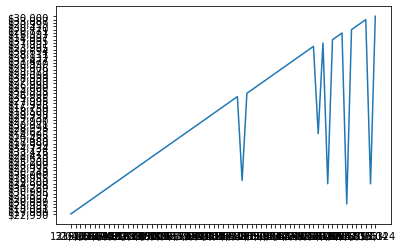

In [45]:
# start with f-150 to view price changes by year and by mileage for otherwise equivalent vehicles
f150_2017 = vehicle_data.loc[(vehicle_data['model'] == 'f-150') & (vehicle_data['year'] == 2017)]

x = f150_2017['mileage']
y = f150_2017['price']

plt.plot(x, y);

(65, 13)